In [1]:
import urllib.request
import zipfile
import os

# URL du dataset
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"

# Chemin où tu veux sauvegarder le zip
save_path = r"C:\Users\PC\OneDrive\Desktop\IA reconnaisssance\cats_and_dogs_filtered.zip"

# Télécharger le fichier
urllib.request.urlretrieve(url, save_path)

# Dossier d'extraction
extract_path = r"C:\Users\PC\OneDrive\Desktop\IA reconnaisssance\cats_and_dogs_filtered"

with zipfile.ZipFile(save_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Téléchargement et extraction terminés dans :", extract_path)


✅ Téléchargement et extraction terminés dans : C:\Users\PC\OneDrive\Desktop\IA reconnaisssance\cats_and_dogs_filtered


In [2]:
import os
#base = r"C:\Users\PC\OneDrive\Desktop\IA reconnaisssance\cats_and_dogs_filtered"
base=r"C:\Users\PC\OneDrive\Desktop\IA reconnaisssance\Projet-Python_Reconnaissance-d-image\cats_and_dogs_filtered"

train = os.path.join(base, 'train')
validation = os.path.join(base, 'validation')

# Sous-dossiers
train_cats = os.path.join(train, 'cats')
train_dogs = os.path.join(train, 'dogs')
validation_cats = os.path.join(validation, 'cats')
validation_dogs = os.path.join(validation, 'dogs')


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
from mes_fonctions import *
model1=model_cnn(input_shape=(64,64,3), dense_units=128, dropout_rate=0.4)
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 128)       

In [24]:
from train_model_cnn import *
model,history=train_cnn_model(train,validation,epochs=10,augment=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
 61/100 [=================>............] - ETA: 12s - loss: 0.7258 - acc: 0.5230

KeyboardInterrupt: 

In [8]:
acc= history.history['acc']
val_acc = history.history['val_acc']

loss_acc= history.history['loss']
val_loss_acc= history.history['val_loss']
epochs = len(acc)

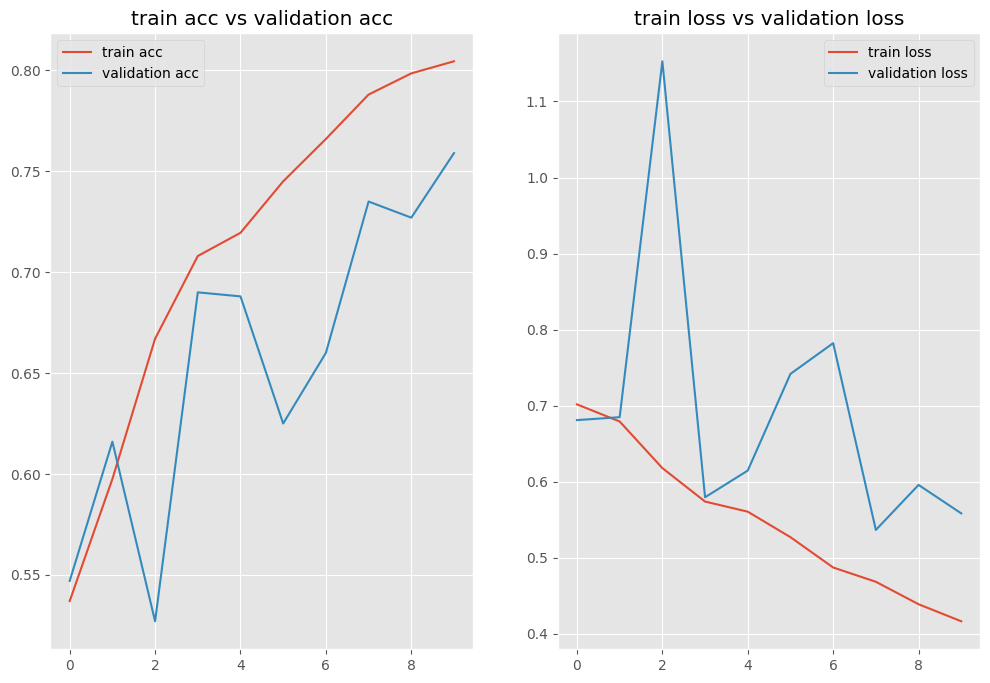

In [9]:

import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.plot(np.arange(epochs),acc,label = "train acc")
plt.plot(np.arange(epochs),val_acc,label = "validation acc")
plt.title("train acc vs validation acc")
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(epochs),loss_acc,label = "train loss")
plt.plot(np.arange(epochs),val_loss_acc,label = "validation loss")
plt.title("train loss vs validation loss")
plt.legend()
plt.show()



In [9]:
from pred_alea_img import predict_img

In [11]:
train_generator, validation_generator=creation_generators(train,validation)

FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: 'C:\\Users\\PC\\OneDrive\\Desktop\\IA reconnaisssance\\cats_and_dogs_filtered\\train'

1/1 [==============================] - 0s 31ms/step


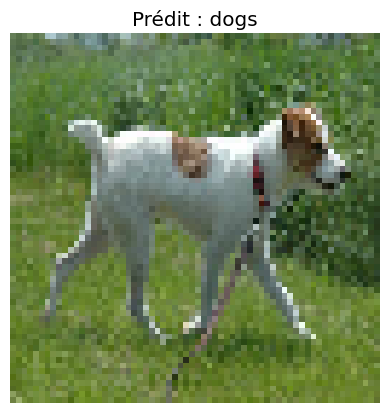

Valeur du modèle: 0.5226
L'animal sur l'image est un : dogs


In [39]:
pred = predict_img(model1, train_generator, train, target_size=(64,64))

On a un overfitting(sur-apprentissage)
Notre modèle apprend mal donc on va essayer d'am"liorer notre modèle en  augmentant nos images en appliquant quelques transformations aléatoires telles que la rotation, le zoom, le retournement horizontal,... et en 
augmentant le nombre d'epochs

In [1]:
import os
#base = r"C:\Users\PC\OneDrive\Desktop\IA reconnaisssance\cats_and_dogs_filtered"
base=r"C:\Users\PC\OneDrive\Desktop\IA reconnaisssance\Projet-Python_Reconnaissance-d-image\cats_and_dogs_filtered"

train = os.path.join(base, 'train')
validation = os.path.join(base, 'validation')

# Sous-dossiers
train_cats = os.path.join(train, 'cats')
train_dogs = os.path.join(train, 'dogs')
validation_cats = os.path.join(validation, 'cats')
validation_dogs = os.path.join(validation, 'dogs')

In [2]:
from train_model_cnn import *
model2=model_cnn(input_shape=(150,150,3), dense_units=512, dropout_rate=0.4,)
model2.summary()
model,history=train_cnn_model(train,validation,epochs=40,augment=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

: 

In [ ]:
acc= history.history['acc']
val_acc = history.history['val_acc']

loss_acc= history.history['loss']
val_loss_acc= history.history['val_loss']
epochs = len(acc)

In [2]:

plt.figure(figsize = (12,8))

plt.subplot(1,2,1)
plt.plot(np.arange(epochs),acc,label = "train acc")
plt.plot(np.arange(epochs),val_acc,label = "validation acc")
plt.title("train acc vs validation acc")
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(epochs),loss_acc,label = "train loss")
plt.plot(np.arange(epochs),val_loss_acc,label = "validation loss")
plt.title("train loss vs validation loss")
plt.legend()
plt.show()


NameError: name 'plt' is not defined

In [1]:
from pred_alea_img import predict_img
train_generator, validation_generator=creation_generators(train,validation)
pred = predict_img(model1, train_generator, train, target_size=(150,150))

NameError: name 'creation_generators' is not defined

Notre modèle apprend bien